In [ ]:
#Installing opencv library
!pip install opencv-python

In [ ]:
import cv2
import numpy as np

In [ ]:
#Reading an Image
import cv2
img = cv2.imread(r"/content/LOWIMG.png",0)

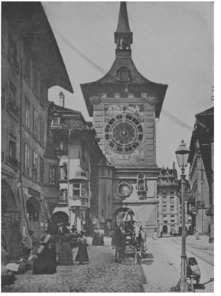

In [ ]:
#Display an Image - using Google Colab
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [ ]:
# Obtain number of rows and columns
row,col = img.shape

In [ ]:
print("Rows of image is : ",row)
print("Columns of image is : ",col)

Rows of image is :  296
Columns of image is :  221


In [ ]:
max = img.max()
min = img.min()
print("Maximum pixel value of image is : ",max)
print("Minimum pixel value of image is : ",min)

Maximum pixel value of image is :  255
Minimum pixel value of image is :  53


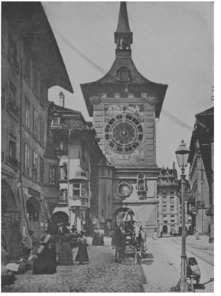

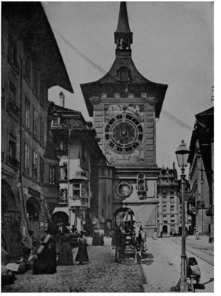

In [ ]:
import numpy as np
histogram_stretched_image = img.copy().astype(np.float64)
max_val = float(max)
min_val = float(min)
for i in range (row):
  for j in range (col):
    val = float(img[i,j])
    val = ((255.0-0.0)*(val-min_val)/(max_val-min_val))+0.0
    histogram_stretched_image[i,j] = np.clip(val,0.0,255.0)
cv2_imshow(img)
cv2_imshow(histogram_stretched_image.astype(np.uint8))

In [ ]:
print("Input Histogram :- ")
print("Maximum pixel value is : ",max)
print("Minimum pixel value is : ",min)
print("Output Histogram :- ")
print("Maximum pixel value is : ",histogram_stretched_image.max())
print("Minimum pixel value is : ",histogram_stretched_image.min())

Input Histogram :- 
Maximum pixel value is :  255
Minimum pixel value is :  53
Output Histogram :- 
Maximum pixel value is :  255.0
Minimum pixel value is :  0.0


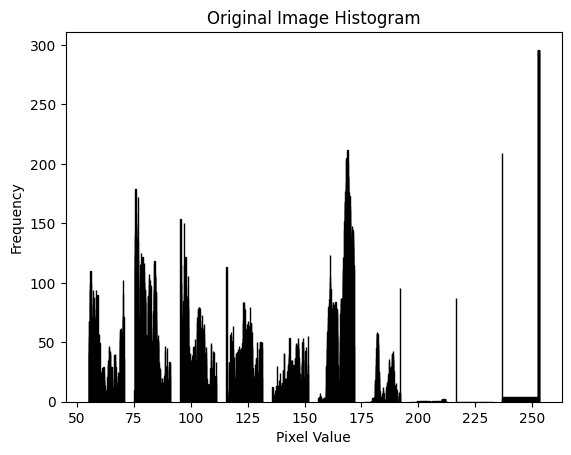

In [ ]:
import matplotlib.pyplot as plt
plt.hist(img,edgecolor='black')
plt.title('Original Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

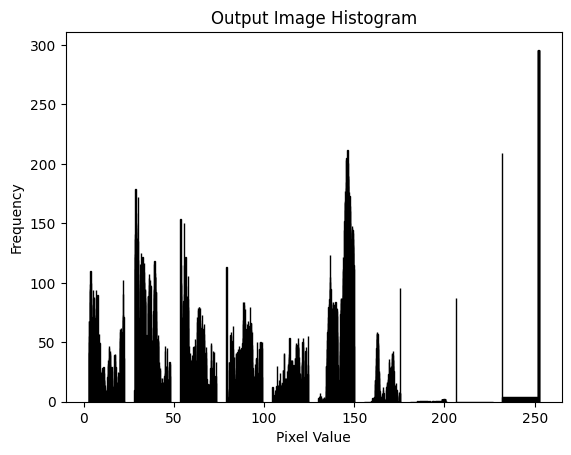

In [ ]:
plt.hist(histogram_stretched_image,edgecolor='black')
plt.title('Output Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
def count_frequencies(data):
    freq = {}
    for item in data:
        freq[item] = freq.get(item, 0) + 1
    return freq


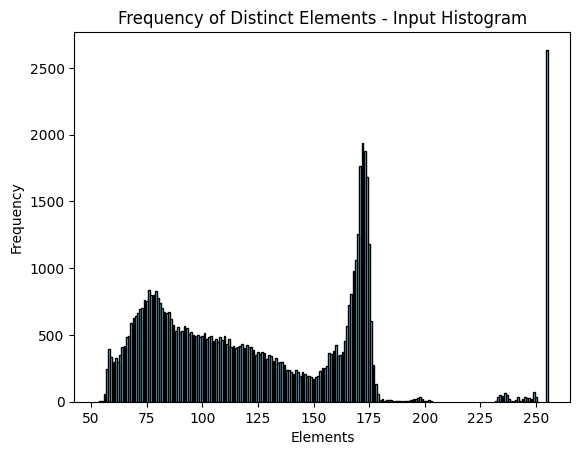

In [ ]:
import matplotlib.pyplot as plt
freq = count_frequencies(img.flatten())
x = list(freq.keys())
y = list(freq.values())

plt.bar(x, y, color='skyblue', edgecolor='black')
plt.xlabel("Elements")
plt.ylabel("Frequency")
plt.title("Frequency of Distinct Elements - Input Histogram")
plt.show()


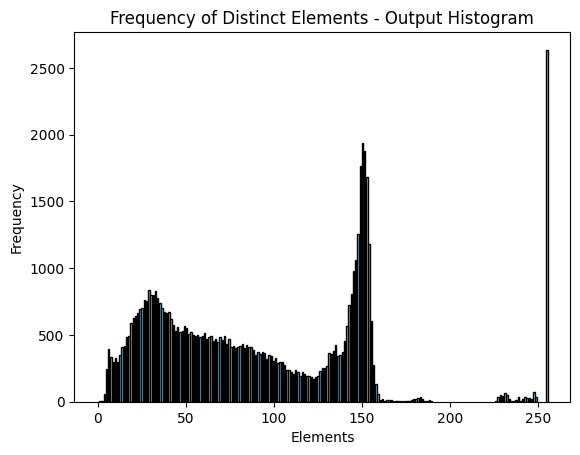

In [ ]:
freq = count_frequencies(histogram_stretched_image.flatten())
x = list(freq.keys())
y = list(freq.values())

plt.bar(x, y, color='skyblue', edgecolor='black')
plt.xlabel("Elements")
plt.ylabel("Frequency")
plt.title("Frequency of Distinct Elements - Output Histogram")
plt.show()

#Histogram Equalization

In [ ]:
def count_frequencies(data):
    freq = {}
    for item in data:
        freq[item] = freq.get(item, 0) + 1
    return freq


In [ ]:
freq = count_frequencies(img.flatten())
print(freq)

{np.uint8(255): 2636, np.uint8(246): 31, np.uint8(171): 1766, np.uint8(135): 298, np.uint8(133): 329, np.uint8(134): 293, np.uint8(136): 299, np.uint8(140): 224, np.uint8(137): 274, np.uint8(132): 303, np.uint8(138): 241, np.uint8(158): 356, np.uint8(187): 4, np.uint8(199): 24, np.uint8(200): 8, np.uint8(197): 25, np.uint8(195): 23, np.uint8(194): 11, np.uint8(191): 6, np.uint8(198): 32, np.uint8(196): 24, np.uint8(193): 9, np.uint8(201): 8, np.uint8(202): 13, np.uint8(172): 1934, np.uint8(147): 189, np.uint8(146): 206, np.uint8(148): 191, np.uint8(184): 16, np.uint8(190): 2, np.uint8(203): 7, np.uint8(185): 15, np.uint8(189): 8, np.uint8(250): 39, np.uint8(241): 11, np.uint8(116): 412, np.uint8(55): 9, np.uint8(54): 5, np.uint8(56): 58, np.uint8(60): 295, np.uint8(61): 331, np.uint8(57): 244, np.uint8(63): 352, np.uint8(58): 395, np.uint8(59): 335, np.uint8(53): 1, np.uint8(62): 300, np.uint8(65): 418, np.uint8(83): 674, np.uint8(159): 377, np.uint8(163): 376, np.uint8(160): 422, np.u

In [ ]:
sum = 0
for i in freq.values():
  sum +=i
print(sum)

65416


In [ ]:
def probability_distribution_function(data):
    pdf = {}
    for item in data:
        pdf[item] = freq[item]/sum
    return pdf

In [ ]:
pdf = probability_distribution_function(img.flatten())
print(pdf)

{np.uint8(255): 0.04029595206065794, np.uint8(246): 0.0004738901797725327, np.uint8(171): 0.026996453467041704, np.uint8(135): 0.004555460437813379, np.uint8(133): 0.005029350617585911, np.uint8(134): 0.004479026537850067, np.uint8(136): 0.0045707472178060414, np.uint8(140): 0.0034242387183563653, np.uint8(137): 0.004188577717989483, np.uint8(132): 0.00463189433777669, np.uint8(138): 0.003684113978231625, np.uint8(158): 0.0054420936773877954, np.uint8(187): 6.114711997064938e-05, np.uint8(199): 0.0003668827198238963, np.uint8(200): 0.00012229423994129877, np.uint8(197): 0.00038216949981655866, np.uint8(195): 0.00035159593983123395, np.uint8(194): 0.0001681545799192858, np.uint8(191): 9.172067995597408e-05, np.uint8(198): 0.0004891769597651951, np.uint8(196): 0.0003668827198238963, np.uint8(193): 0.00013758101993396112, np.uint8(201): 0.00012229423994129877, np.uint8(202): 0.0001987281399046105, np.uint8(172): 0.029564632505808975, np.uint8(147): 0.0028892014186131833, np.uint8(146): 0.

In [ ]:
def cumulative_distribution_function(pdf):
    cdf = {}
    cumulative_probability = 0.0

    sorted_pixel_values = sorted(pdf.keys())

    for key in sorted_pixel_values:
        cumulative_probability += pdf[key]
        cdf[key] = cumulative_probability

    return cdf

In [ ]:
cdf = cumulative_distribution_function(pdf)
print(cdf)

{np.uint8(53): 1.5286779992662346e-05, np.uint8(54): 9.172067995597406e-05, np.uint8(55): 0.00022930169988993518, np.uint8(56): 0.0011159349394643512, np.uint8(57): 0.004845909257673964, np.uint8(58): 0.010884187354775591, np.uint8(59): 0.016005258652317476, np.uint8(60): 0.020514858750152867, np.uint8(61): 0.025574782927724103, np.uint8(62): 0.030160816925522808, np.uint8(63): 0.035541763482939956, np.uint8(64): 0.041855203619909506, np.uint8(65): 0.04824507765684237, np.uint8(66): 0.05562859239329828, np.uint8(67): 0.06314968814968816, np.uint8(68): 0.07215360156536628, np.uint8(69): 0.08170783906078025, np.uint8(70): 0.09156781215604747, np.uint8(71): 0.10168766051118994, np.uint8(72): 0.11232725938608293, np.uint8(73): 0.12308915250091722, np.uint8(74): 0.13475296563531858, np.uint8(75): 0.1463097713097713, np.uint8(76): 0.15908951938363702, np.uint8(77): 0.1713189433777669, np.uint8(78): 0.18356365415188944, np.uint8(79): 0.19626696832579185, np.uint8(80): 0.2080989360401125, np.u

In [ ]:
def normalized_cdf(cdf):
  normalized_value = {}
  for key in cdf.keys():
    normalized_value[key] = round(cdf[key]*255)
  return normalized_value

normalized_cdf = normalized_cdf(cdf)
print(normalized_cdf)

{np.uint8(53): 0, np.uint8(54): 0, np.uint8(55): 0, np.uint8(56): 0, np.uint8(57): 1, np.uint8(58): 3, np.uint8(59): 4, np.uint8(60): 5, np.uint8(61): 7, np.uint8(62): 8, np.uint8(63): 9, np.uint8(64): 11, np.uint8(65): 12, np.uint8(66): 14, np.uint8(67): 16, np.uint8(68): 18, np.uint8(69): 21, np.uint8(70): 23, np.uint8(71): 26, np.uint8(72): 29, np.uint8(73): 31, np.uint8(74): 34, np.uint8(75): 37, np.uint8(76): 41, np.uint8(77): 44, np.uint8(78): 47, np.uint8(79): 50, np.uint8(80): 53, np.uint8(81): 56, np.uint8(82): 59, np.uint8(83): 61, np.uint8(84): 64, np.uint8(85): 67, np.uint8(86): 69, np.uint8(87): 71, np.uint8(88): 73, np.uint8(89): 75, np.uint8(90): 77, np.uint8(91): 80, np.uint8(92): 82, np.uint8(93): 84, np.uint8(94): 86, np.uint8(95): 88, np.uint8(96): 90, np.uint8(97): 92, np.uint8(98): 94, np.uint8(99): 96, np.uint8(100): 98, np.uint8(101): 100, np.uint8(102): 101, np.uint8(103): 103, np.uint8(104): 105, np.uint8(105): 107, np.uint8(106): 109, np.uint8(107): 111, np.ui

In [ ]:
equalised_image = img.copy()
for i in range(row):
  for j in range(col):
    if img[i,j] in normalized_cdf.keys():
      equalised_image[i,j] = normalized_cdf[img[i,j]]

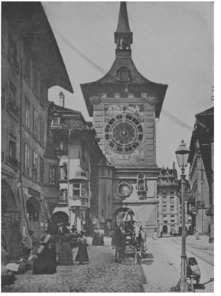

In [ ]:
cv2_imshow(img)

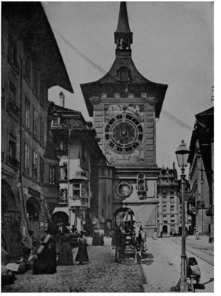

In [ ]:
cv2_imshow(histogram_stretched_image)

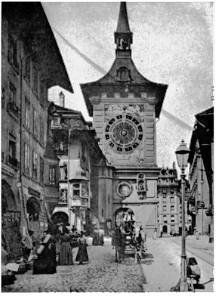

In [ ]:
cv2_imshow(equalised_image)

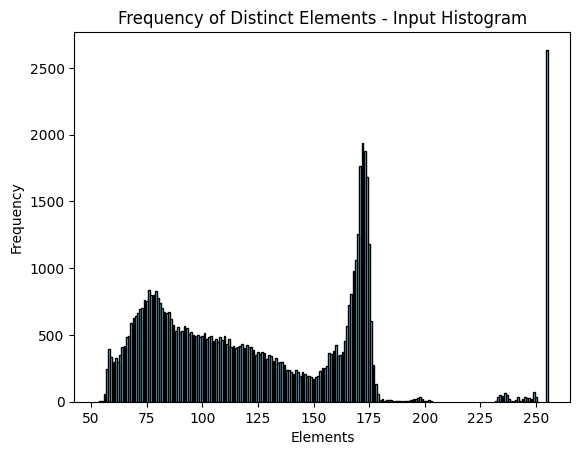

In [ ]:
import matplotlib.pyplot as plt
freq = count_frequencies(img.flatten())
x = list(freq.keys())
y = list(freq.values())

plt.bar(x, y, color='skyblue', edgecolor='black')
plt.xlabel("Elements")
plt.ylabel("Frequency")
plt.title("Frequency of Distinct Elements - Input Histogram")
plt.show()


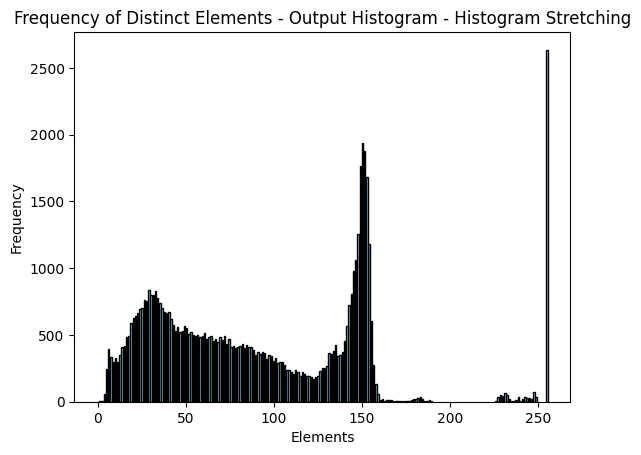

In [ ]:
import matplotlib.pyplot as plt
freq = count_frequencies(histogram_stretched_image.flatten())
x = list(freq.keys())
y = list(freq.values())

plt.bar(x, y, color='skyblue', edgecolor='black')
plt.xlabel("Elements")
plt.ylabel("Frequency")
plt.title("Frequency of Distinct Elements - Output Histogram - Histogram Stretching")
plt.show()

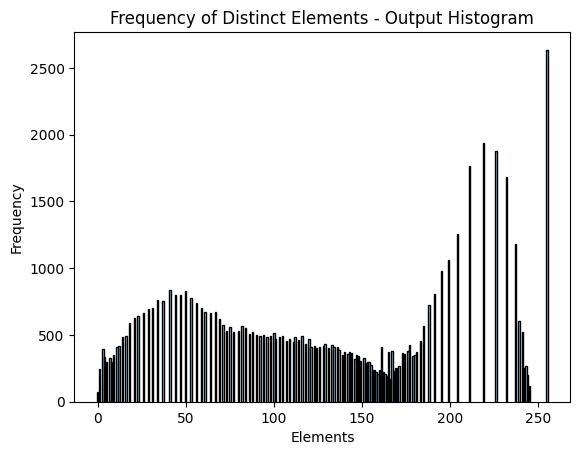

In [ ]:
import matplotlib.pyplot as plt
freq = count_frequencies(equalised_image.flatten())
x = list(freq.keys())
y = list(freq.values())

plt.bar(x, y, color='skyblue', edgecolor='black')
plt.xlabel("Elements")
plt.ylabel("Frequency")
plt.title("Frequency of Distinct Elements - Output Histogram")
plt.show()
